# Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import random

# Get preprocessed data

In [2]:
df = pd.read_csv('preprocessed_edu_data.csv')

In [3]:
df.head() # Looking at our data to ensure the right data was pulled. 

,is_male,has_college_degree,free_reduced_lunch,completed_test_prep,parents_married,practiced_sport,is_first_child,nr_siblings,rides_bus,wkly_study_hours_< 5,wkly_study_hours_> 10,risk_cat
0,0,1,1,0,1,1,1,3.0,1,1,0,1
1,0,1,1,0,1,1,1,0.0,1,0,0,0
2,0,1,1,0,0,1,1,4.0,1,1,0,0
3,1,1,1,0,1,0,0,1.0,1,0,0,1
4,1,1,1,0,1,1,1,0.0,1,0,0,0


In [4]:
# # Generate a random student ID function
# def generate_student_id():
#     # Generate the first two digits
#     first_two_digits = random.randint(0, 9)
    
#     # Generate the remaining digits (8 digits in total)
#     remaining_digits = ''.join(random.choices('0123456789', k=8))
    
#     # Combine the first two digits with the remaining digits
#     student_id = str(first_two_digits) * 2 + remaining_digits
    
#     return student_id

# # Generate student IDs and assign them to a new column 'Student ID'
# df['student_id'] = [generate_student_id() for _ in range(len(df))]

# # Print the DataFrame
# df.head()

# **Goals:** 
* Identify features that have the most statistical value to the risk cat which is our new target variable 1 = students who are considered at risk and 0 = students who are not at risk. 
* We will run statistical testing to determine statistical significance
* identify features that pertain more to parents social status 

`has_college_degree`:
### H$_0$: There is no statistical significant in parents' education status
### H$_A$: There is a significant statistical importance in parents' education status 

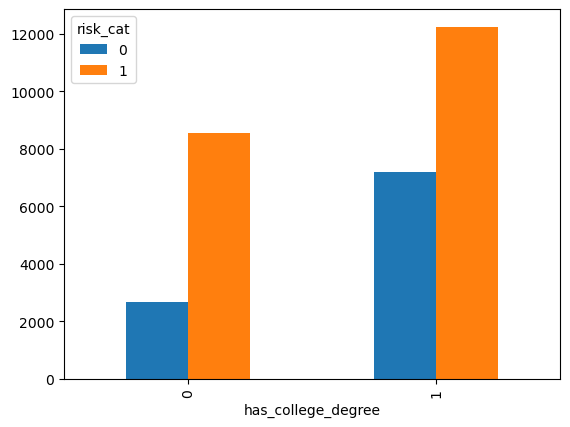

In [5]:
college_degree_crosstab = pd.crosstab(df.has_college_degree, df.risk_cat)
college_degree_crosstab.plot(kind='bar')
plt.show()

In [6]:
from scipy.stats import chi2_contingency

In [7]:
chi2, p_value, dof, expected = chi2_contingency(college_degree_crosstab)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 565.4374933443069
p-value: 5.51812391114815e-125
Degrees of freedom: 1
Expected frequencies: [[ 3604.98143011  7599.01856989]
 [ 6254.01856989 13182.98143011]]


In [8]:
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


### **Keytake aways:**
* Chi-square statistic: The chi-square statistic measures the discrepancy between the observed frequencies and the expected frequencies in a contingency table. In this case, the calculated chi-square statistic is 565.44, indicating a significant difference between the observed and expected frequencies.
* p-value: The p-value is a measure of the evidence against the null hypothesis. In this case, the extremely small p-value of approximately 5.52e-125 suggests very strong evidence against the null hypothesis. It indicates that the observed differences in the contingency table are highly unlikely to occur by chance alone.
* Degrees of freedom: The degrees of freedom represent the number of categories that are free to vary in a statistical test. In this test, there is 1 degree of freedom, which is determined by the number of categories minus 1.
* Expected frequencies: The expected frequencies are the values that would be expected in each cell of the contingency table if there was no association between the variables. In this case, the expected frequencies are given as [[3604.98, 7599.02], [6254.02, 13182.98]], indicating the expected distribution of frequencies based on the null hypothesis.
* Overall, these results suggest a significant association between the variables being tested, as the observed frequencies deviate significantly from what would be expected under the null hypothesis.

# `free_reduced_lunch` is avaliable to students who are in low income families. We can use this to gauge if fiancial class affects a students performance.

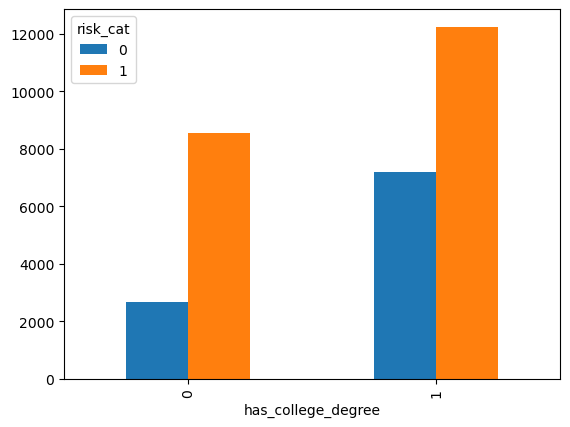

In [9]:
lunch_status_crosstab = pd.crosstab(df.free_reduced_lunch, df.risk_cat)
college_degree_crosstab.plot(kind='bar')
plt.show()

In [10]:
chi2_, p_value_, dof_, expected_ = chi2_contingency(lunch_status_crosstab)

# Print the results
print("Chi-square statistic:", chi2_)
print("p-value:", p_value_)
print("Degrees of freedom:", dof_)
print("Expected frequencies:", expected_)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 0
Expected frequencies: [[ 9859. 20782.]]


In [11]:
alpha = 0.05  # Significance level

if p_value_ < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


# Now to see `parents_married`  and its affect on risk category

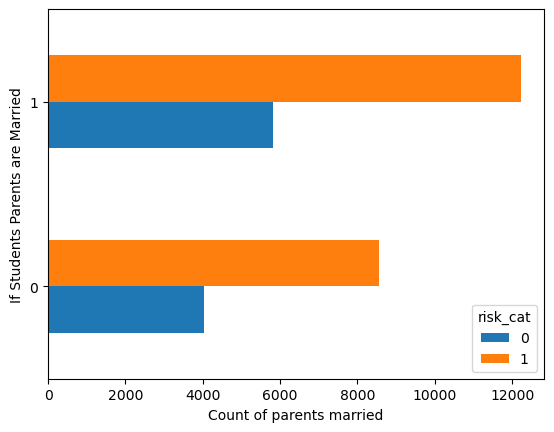

In [18]:
pd.crosstab(df.parents_married, df.risk_cat).plot(kind='barh')
plt.xlabel('Count of parents married')
plt.ylabel('If Students Parents are Married')
plt.show()

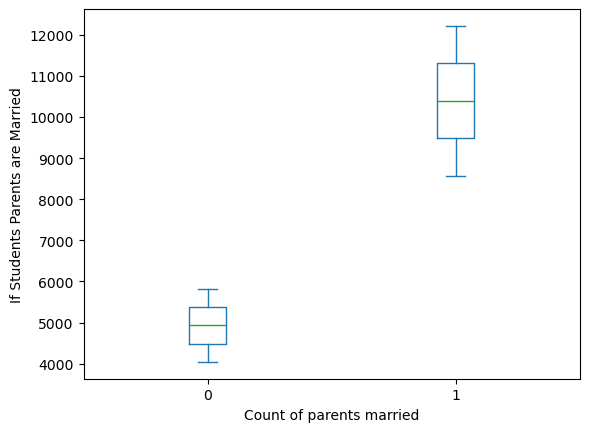

In [20]:
pd.crosstab(df.parents_married, df.risk_cat).plot(kind='box')
plt.xlabel('Count of parents married')
plt.ylabel('If Students Parents are Married')
plt.show()

<Axes: xlabel='rides_bus'>

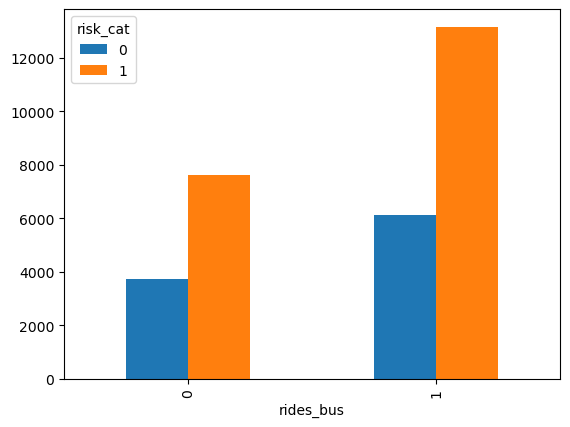

In [23]:
pd.crosstab(df.rides_bus, df.risk_cat).plot(kind='bar')

In [34]:
print(f'The amount of students riding the bus is {len(df[df.rides_bus == 1])}.')
print(f'The amount of students not riding the bus is {len(df[df.rides_bus == 0])}.')

The amount of students riding the bus is 19279.
The amount of students not riding the bus is 11362.
